In [1]:
"""Module imports"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

seed = 1234

In [2]:
"""Train/test/validation data preparation"""

# For the sake of my current sanity the model does NOT have any strings in it

train_df = pd.read_csv('training_data.csv')
test_df = pd.read_csv('testing_data.csv')
val_df = pd.read_csv('validation_data.csv')

train_df = train_df.drop(columns=['date', 'title', 'stock'])
val_df = val_df.drop(columns=['date', 'title', 'stock'])
test_df = test_df.drop(columns=['date', 'title', 'stock'])

train_df = train_df.dropna()
val_df = val_df.dropna()
test_df = test_df.dropna()

# Preparing training data
X_train = train_df.drop(columns=['label_3', 'label_7'])
y_train = train_df['label_3']

# Preparing testing data
X_test = test_df.drop(columns=['label_3', 'label_7'])
y_test = test_df['label_3']

# Preparing validation data
X_val = val_df.drop(columns=['label_3', 'label_7'])
y_val = val_df['label_3']

In [3]:
print("Train distribution:\n", y_train.value_counts(normalize=True))
print("Val distribution:\n", y_val.value_counts(normalize=True))
print("Test distribution:\n", y_test.value_counts(normalize=True))

print(X_train.columns.equals(X_test.columns))  # Should be True
print(X_train.dtypes == X_test.dtypes)         # Should all be True

Train distribution:
 label_3
hold    0.753533
buy     0.132857
sell    0.113610
Name: proportion, dtype: float64
Val distribution:
 label_3
hold    0.754032
buy     0.130965
sell    0.115003
Name: proportion, dtype: float64
Test distribution:
 label_3
hold    0.750186
buy     0.136405
sell    0.113409
Name: proportion, dtype: float64
True
open                     True
high                     True
low                      True
close                    True
volume                   True
daily_variation          True
daily_return             True
sma_7                    True
std_7                    True
ema_14                   True
macd                     True
macd_signal              True
cumulative_return        True
gain                     True
loss                     True
rsi                      True
L14                      True
H14                      True
stochastic_oscillator    True
prev_high                True
prev_low                 True
prev_close               True

In [62]:
"""Finding the best number of iterations to make sure this thing doesn't like explode"""
#iterations = [100, 500, 750, 1000]

tr_accuracy = []
te_accuracy = []
val_accuracy = []

tr_error = []
te_error = []
va_error = []

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

iterations = [2000]

model = LogisticRegression(solver = 'sag', penalty='l2', max_iter=iterations[0], random_state = seed, class_weight='balanced')

model.fit(X_train_scaled, y_train)

# Calculate training accuracy and error 
tr_err = 1 - model.score(X_train_scaled, y_train)
tr_acc = model.score(X_train_scaled, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val_scaled, y_val)  # Accuracy on validation set
val_error = 1 - val_acc  # Error is 1 - accuracy

# Calculate testing accuracy and error
te_acc = model.score(X_test_scaled, y_test)
te_err = 1 - model.score(X_test_scaled, y_test)

# Store the results in lists
tr_accuracy.append(tr_acc)
val_accuracy.append(val_acc)
te_accuracy.append(te_acc)

tr_error.append(tr_err)
va_error.append(val_error)
te_error.append(te_err)


Training Error:[0.42533960709253793]
Validation Error:[0.4268050616160781]
Testing Error:[0.4256348746794607]


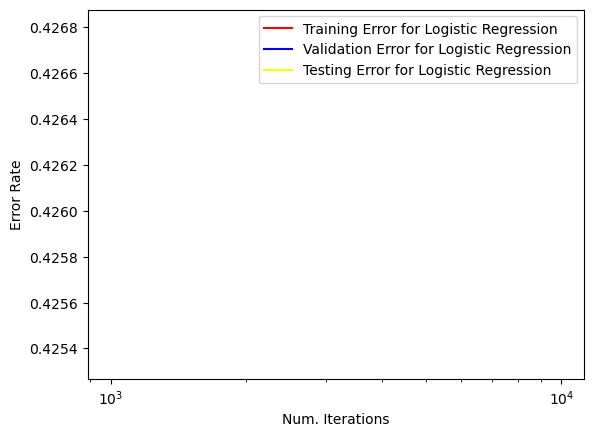

In [63]:
"""Plotting error/accuracy rates"""
print(f'Training Error:{tr_error}')
print(f'Validation Error:{va_error}')
print(f'Testing Error:{te_error}')

plt.semilogx(iterations, tr_error, color = 'red', label = 'Training Error for Logistic Regression')
plt.semilogx(iterations, va_error, color = 'blue', label = 'Validation Error for Logistic Regression')
plt.semilogx(iterations, te_error, color = 'yellow', label = 'Testing Error for Logistic Regression')

plt.xlabel('Num. Iterations')
plt.ylabel('Error Rate')

plt.legend();

Training Error:[0.4253307458507235]
Validation Error:[0.42697047390621123]
Testing Error:[0.42625527338903135]


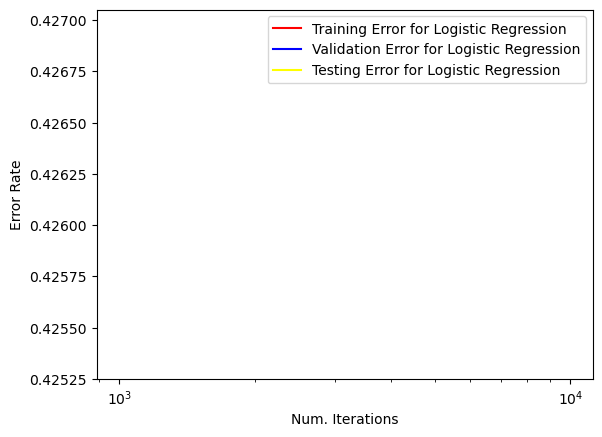

In [64]:
"""Finding the best number of iterations to make sure this thing doesn't like explode"""
# 2000 max iterations, saga, 
#iterations = [100, 500, 750, 1000]

tr_accuracy = []
te_accuracy = []
val_accuracy = []

tr_error = []
te_error = []
va_error = []

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

iterations = [2000]

model = LogisticRegression(solver = 'saga', penalty='l2', max_iter=iterations[0], random_state = seed, class_weight='balanced')

model.fit(X_train_scaled, y_train)

# Calculate training accuracy and error 
tr_err = 1 - model.score(X_train_scaled, y_train)
tr_acc = model.score(X_train_scaled, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val_scaled, y_val)  # Accuracy on validation set
val_error = 1 - val_acc  # Error is 1 - accuracy

# Calculate testing accuracy and error
te_acc = model.score(X_test_scaled, y_test)
te_err = 1 - model.score(X_test_scaled, y_test)

# Store the results in lists
tr_accuracy.append(tr_acc)
val_accuracy.append(val_acc)
te_accuracy.append(te_acc)

tr_error.append(tr_err)
va_error.append(val_error)
te_error.append(te_err)

"""Plotting error/accuracy rates"""
print(f'Training Error:{tr_error}')
print(f'Validation Error:{va_error}')
print(f'Testing Error:{te_error}')

plt.semilogx(iterations, tr_error, color = 'red', label = 'Training Error for Logistic Regression')
plt.semilogx(iterations, va_error, color = 'blue', label = 'Validation Error for Logistic Regression')
plt.semilogx(iterations, te_error, color = 'yellow', label = 'Testing Error for Logistic Regression')

plt.xlabel('Num. Iterations')
plt.ylabel('Error Rate')

plt.legend();

In [67]:
# solver = saga, penalty = elasticnet, l1_ratio = 0.7, max iterations = 2000
tr_accuracy = []
te_accuracy = []
val_accuracy = []

tr_error = []
te_error = []
va_error = []

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

iterations = [2000]

model = LogisticRegression(solver = 'saga', penalty='elasticnet', l1_ratio = 0.7, max_iter=iterations[0], random_state = seed, class_weight='balanced')

model.fit(X_train_scaled, y_train)

# Calculate training accuracy and error 
y_pred = model.predict(X_train_scaled)
tr_err = 1 - model.score(X_train_scaled, y_train)
tr_acc = model.score(X_train_scaled, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val_scaled, y_val)  # Accuracy on validation set
val_error = 1 - val_acc  # Error is 1 - accuracy

# Calculate testing accuracy and error
te_acc = model.score(X_test_scaled, y_test)
te_err = 1 - model.score(X_test_scaled, y_test)

# Store the results in lists
tr_accuracy.append(tr_acc)
val_accuracy.append(val_acc)
te_accuracy.append(te_acc)

tr_error.append(tr_err)
va_error.append(val_error)
te_error.append(te_err)

"""Plotting error/accuracy rates"""
print(f'Training Error:{tr_error}')
print(f'Validation Error:{va_error}')
print(f'Testing Error:{te_error}')

/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training Error:[0.42462184650556933]
Validation Error:[0.42630882474567855]
Testing Error:[0.4251799156257755]


In [69]:
# solver = saga, penalty = elasticnet, l1_ratio = 0.85, max iterations = 2000
tr_accuracy = []
te_accuracy = []
val_accuracy = []

tr_error = []
te_error = []
va_error = []

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

iterations = 2500

model = LogisticRegression(solver = 'saga', penalty='elasticnet', l1_ratio = 0.85, max_iter=iterations, random_state = seed, class_weight='balanced')

model.fit(X_train_scaled, y_train)

# Calculate training accuracy and error 
tr_err = 1 - model.score(X_train_scaled, y_train)
tr_acc = model.score(X_train_scaled, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val_scaled, y_val)  # Accuracy on validation set
val_error = 1 - val_acc  # Error is 1 - accuracy

# Calculate testing accuracy and error
te_acc = model.score(X_test_scaled, y_test)
te_err = 1 - model.score(X_test_scaled, y_test)

# Store the results in lists
tr_accuracy.append(tr_acc)
val_accuracy.append(val_acc)
te_accuracy.append(te_acc)

tr_error.append(tr_err)
va_error.append(val_error)
te_error.append(te_err)

"""Plotting error/accuracy rates"""
print(f'Training Error:{tr_error}')
print(f'Validation Error:{va_error}')
print(f'Testing Error:{te_error}')

Training Error:[0.4241167557221469]
Validation Error:[0.425647175585146]
Testing Error:[0.4248490363140045]


In [ ]:
# solver = saga, penalty = elasticnet, l1_ratio = 0.85, max iterations = 2000
tr_accuracy = []
te_accuracy = []
val_accuracy = []

tr_error = []
te_error = []
va_error = []

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

iterations = 2500

model = LogisticRegression(solver = 'lbfgs', penalty = 'l2', max_iter=iterations, random_state = seed, class_weight='balanced')

model.fit(X_train_scaled, y_train)

# Calculate training accuracy and error 
tr_err = 1 - model.score(X_train_scaled, y_train)
tr_acc = model.score(X_train_scaled, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val_scaled, y_val)  # Accuracy on validation set
val_error = 1 - val_acc  # Error is 1 - accuracy

# Calculate testing accuracy and error
te_acc = model.score(X_test_scaled, y_test)
te_err = 1 - model.score(X_test_scaled, y_test)

# Store the results in lists
tr_accuracy.append(tr_acc)
val_accuracy.append(val_acc)
te_accuracy.append(te_acc)

tr_error.append(tr_err)
va_error.append(val_error)
te_error.append(te_err)

"""Plotting error/accuracy rates"""
print(f'Training Error:{tr_error}')
print(f'Validation Error:{va_error}')
print(f'Testing Error:{te_error}')

In [71]:
# solver = saga, penalty = elasticnet, l1_ratio = 0.85, max iterations = 2000
tr_accuracy = []
te_accuracy = []
val_accuracy = []

tr_error = []
te_error = []
va_error = []

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

iterations = 2500

model = LogisticRegression(solver = 'saga', penalty='elasticnet', l1_ratio = 0.3, max_iter=iterations, random_state = seed, class_weight='balanced')

model.fit(X_train_scaled, y_train)

# Calculate training accuracy and error 
tr_err = 1 - model.score(X_train_scaled, y_train)
tr_acc = model.score(X_train_scaled, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val_scaled, y_val)  # Accuracy on validation set
val_error = 1 - val_acc  # Error is 1 - accuracy

# Calculate testing accuracy and error
te_acc = model.score(X_test_scaled, y_test)
te_err = 1 - model.score(X_test_scaled, y_test)

# Store the results in lists
tr_accuracy.append(tr_acc)
val_accuracy.append(val_acc)
te_accuracy.append(te_acc)

tr_error.append(tr_err)
va_error.append(val_error)
te_error.append(te_err)

"""Plotting error/accuracy rates"""
print(f'Training Error:{tr_error}')
print(f'Validation Error:{va_error}')
print(f'Testing Error:{te_error}')

Training Error:[0.4249585736945175]
Validation Error:[0.42651559010834506]
Testing Error:[0.4256348746794607]


In [72]:
# solver = saga, penalty = elasticnet, l1_ratio = 0.85, max iterations = 2000
tr_accuracy = []
te_accuracy = []
val_accuracy = []

tr_error = []
te_error = []
va_error = []

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

iterations = 2500

model = LogisticRegression(solver = 'saga', penalty='l2', max_iter=iterations, random_state = seed, class_weight='balanced')

model.fit(X_train_scaled, y_train)

# Calculate training accuracy and error 
tr_err = 1 - model.score(X_train_scaled, y_train)
tr_acc = model.score(X_train_scaled, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val_scaled, y_val)  # Accuracy on validation set
val_error = 1 - val_acc  # Error is 1 - accuracy

# Calculate testing accuracy and error
te_acc = model.score(X_test_scaled, y_test)
te_err = 1 - model.score(X_test_scaled, y_test)

# Store the results in lists
tr_accuracy.append(tr_acc)
val_accuracy.append(val_acc)
te_accuracy.append(te_acc)

tr_error.append(tr_err)
va_error.append(val_error)
te_error.append(te_err)

"""Plotting error/accuracy rates"""
print(f'Training Error:{tr_error}')
print(f'Validation Error:{va_error}')
print(f'Testing Error:{te_error}')

Training Error:[0.4253307458507235]
Validation Error:[0.42697047390621123]
Testing Error:[0.42625527338903135]


In [73]:
# solver = saga, penalty = elasticnet, l1_ratio = 0.95, max iterations = 2000
tr_accuracy = []
te_accuracy = []
val_accuracy = []

tr_error = []
te_error = []
va_error = []

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

iterations = 2500

model = LogisticRegression(solver = 'saga', penalty='elasticnet', l1_ratio = 0.95, max_iter=iterations, random_state = seed, class_weight='balanced')

model.fit(X_train_scaled, y_train)

# Calculate training accuracy and error 
tr_err = 1 - model.score(X_train_scaled, y_train)
tr_acc = model.score(X_train_scaled, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val_scaled, y_val)  # Accuracy on validation set
val_error = 1 - val_acc  # Error is 1 - accuracy

# Calculate testing accuracy and error
te_acc = model.score(X_test_scaled, y_test)
te_err = 1 - model.score(X_test_scaled, y_test)

# Store the results in lists
tr_accuracy.append(tr_acc)
val_accuracy.append(val_acc)
te_accuracy.append(te_acc)

tr_error.append(tr_err)
va_error.append(val_error)
te_error.append(te_err)

"""Plotting error/accuracy rates"""
print(f'Training Error:{tr_error}')
print(f'Validation Error:{va_error}')
print(f'Testing Error:{te_error}')

Training Error:[0.42412561696396134]
Validation Error:[0.4253990571499462]
Testing Error:[0.42443543717429066]


In [74]:
# solver = saga, penalty = elasticnet, l1_ratio = 0.95, max iterations = 2000
tr_accuracy = []
te_accuracy = []
val_accuracy = []

tr_error = []
te_error = []
va_error = []

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

iterations = 2500

model = LogisticRegression(solver = 'saga', penalty='elasticnet', l1_ratio = 0.98, max_iter=iterations, random_state = seed, class_weight='balanced')

model.fit(X_train_scaled, y_train)

# Calculate training accuracy and error 
tr_err = 1 - model.score(X_train_scaled, y_train)
tr_acc = model.score(X_train_scaled, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val_scaled, y_val)  # Accuracy on validation set
val_error = 1 - val_acc  # Error is 1 - accuracy

# Calculate testing accuracy and error
te_acc = model.score(X_test_scaled, y_test)
te_err = 1 - model.score(X_test_scaled, y_test)

# Store the results in lists
tr_accuracy.append(tr_acc)
val_accuracy.append(val_acc)
te_accuracy.append(te_acc)

tr_error.append(tr_err)
va_error.append(val_error)
te_error.append(te_err)

"""Plotting error/accuracy rates"""
print(f'Training Error:{tr_error}')
print(f'Validation Error:{va_error}')
print(f'Testing Error:{te_error}')

Training Error:[0.4242673968329922]
Validation Error:[0.4250268794971467]
Testing Error:[0.42480767640003314]


Training Error:[0.42437373173476534]
Validation Error:[0.42568852865767925]
Testing Error:[0.4253039953676896]


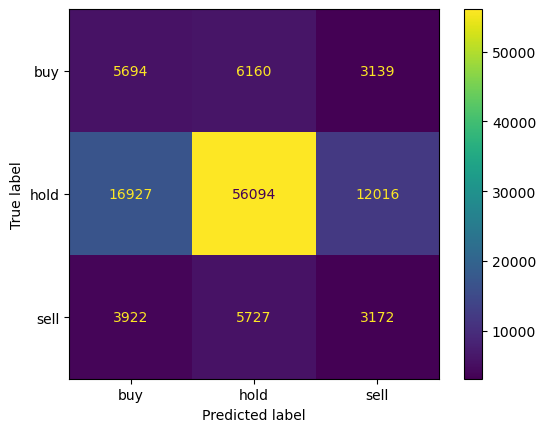

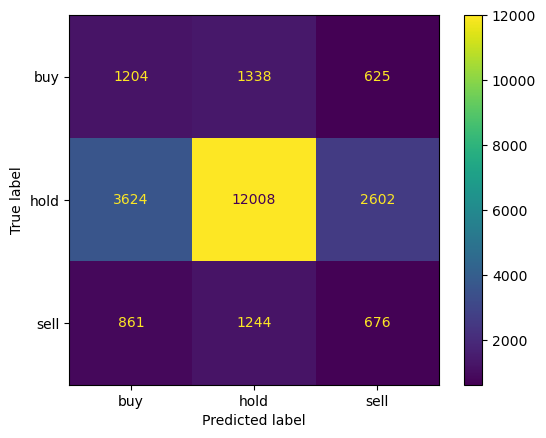

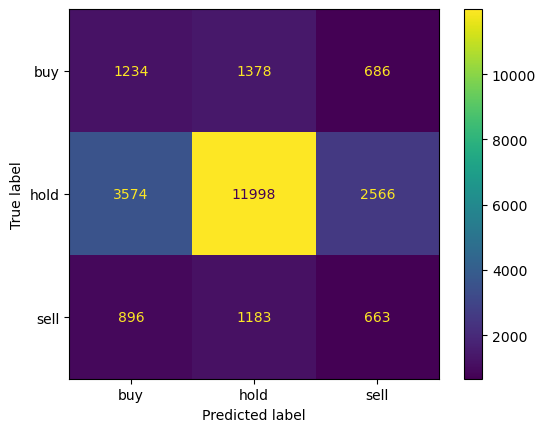

In [5]:
# solver = saga, penalty = elasticnet, l1_ratio = 0.95, max iterations = 2000
tr_accuracy = []
te_accuracy = []
val_accuracy = []

tr_error = []
te_error = []
va_error = []

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

iterations = 2500

model = LogisticRegression(C = 0.7, solver = 'saga', penalty='elasticnet', l1_ratio = 0.98, max_iter=iterations, random_state = seed, class_weight='balanced')

model.fit(X_train_scaled, y_train)

# Calculate training accuracy and error 
tr_err = 1 - model.score(X_train_scaled, y_train)
tr_acc = model.score(X_train_scaled, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val_scaled, y_val)  # Accuracy on validation set
val_error = 1 - val_acc  # Error is 1 - accuracy

# Calculate testing accuracy and error
te_acc = model.score(X_test_scaled, y_test)
te_err = 1 - model.score(X_test_scaled, y_test)

# Store the results in lists
tr_accuracy.append(tr_acc)
val_accuracy.append(val_acc)
te_accuracy.append(te_acc)

tr_error.append(tr_err)
va_error.append(val_error)
te_error.append(te_err)

"""Plotting error/accuracy rates"""
print(f'Training Error:{tr_error}')
print(f'Validation Error:{va_error}')
print(f'Testing Error:{te_error}')

# === Confusion Matrices ===
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

labels = ['buy','hold','sell']

cm_train = metrics.confusion_matrix(y_train, y_train_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = labels).plot()

cm_val = metrics.confusion_matrix(y_val, y_val_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_val, display_labels = labels).plot()

cm_test = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = labels).plot()

In [6]:
cols_to_drop = ['open', 'high', 'low','smoothed_plus_dm','smoothed_minus_dm', 'L14', 'H14', 'prev_low', 'prev_close','dx']  # Replace with actual column names
X_train_reduced = X_train.drop(columns=cols_to_drop)
X_val_reduced = X_val.drop(columns=cols_to_drop)
X_test_reduced = X_test.drop(columns=cols_to_drop)

Training Error:[0.42437373173476534, 0.43354511701269816]
Validation Error:[0.42568852865767925, 0.43391779009180387]
Testing Error:[0.4253039953676896, 0.432541980312681]


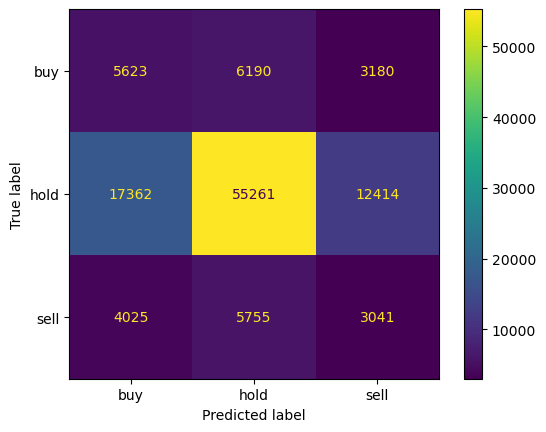

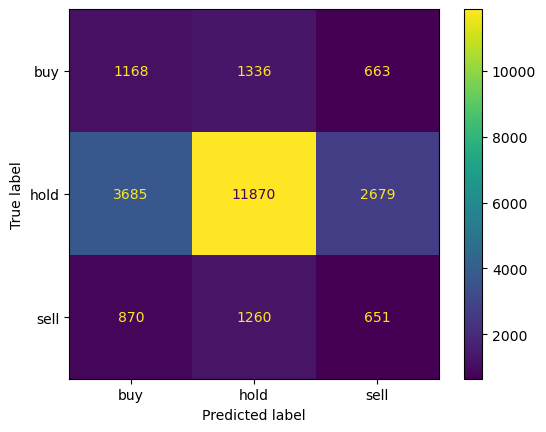

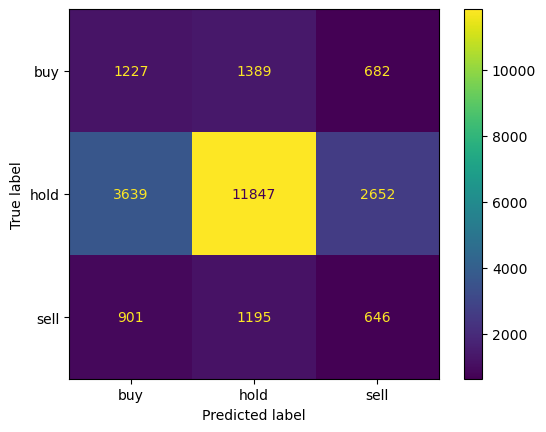

In [7]:
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_val_scaled = scaler.transform(X_val_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

iterations = 2500

model = LogisticRegression(solver = 'saga', penalty='elasticnet', l1_ratio = 0.7, max_iter=iterations, random_state = seed, class_weight='balanced')

model.fit(X_train_scaled, y_train)

# Calculate training accuracy and error 
tr_err = 1 - model.score(X_train_scaled, y_train)
tr_acc = model.score(X_train_scaled, y_train)

# Calculate validation accuracy and error
val_acc = model.score(X_val_scaled, y_val)  # Accuracy on validation set
val_error = 1 - val_acc  # Error is 1 - accuracy

# Calculate testing accuracy and error
te_acc = model.score(X_test_scaled, y_test)
te_err = 1 - model.score(X_test_scaled, y_test)

# Store the results in lists
tr_accuracy.append(tr_acc)
val_accuracy.append(val_acc)
te_accuracy.append(te_acc)

tr_error.append(tr_err)
va_error.append(val_error)
te_error.append(te_err)

"""Plotting error/accuracy rates"""
print(f'Training Error:{tr_error}')
print(f'Validation Error:{va_error}')
print(f'Testing Error:{te_error}')

# === Confusion Matrices ===
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

labels = ['buy','hold','sell']

cm_train = metrics.confusion_matrix(y_train, y_train_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = labels).plot()

cm_val = metrics.confusion_matrix(y_val, y_val_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_val, display_labels = labels).plot()

cm_test = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = labels).plot()

In [8]:
from collections import Counter
print("Train label distribution:", Counter(y_train))
print("Validation label distribution:", Counter(y_val))
print("Test label distribution:", Counter(y_test))

Train label distribution: Counter({'hold': 85037, 'buy': 14993, 'sell': 12821})
Validation label distribution: Counter({'hold': 18234, 'buy': 3167, 'sell': 2781})
Test label distribution: Counter({'hold': 18138, 'buy': 3298, 'sell': 2742})
